# Generate pendulum data

## Print args of database_generator.py

In [3]:
print("\n=====================")
%run database_generator.py --help
print("\n=====================")



usage: database_generator.py [-h] [--ode_system {pendulum,lorentz,Ausgrid}]
                             [--t_max T_MAX] [--step_size STEP_SIZE]
                             [--n_sample N_SAMPLE]
                             [--x_init_pts [X_INIT_PTS ...]]
                             [--ctr_func {designate,gaussian}]
                             [--Ausgrid_customer_id [AUSGRID_CUSTOMER_ID ...]]
                             [--Ausgrid_start_date AUSGRID_START_DATE]
                             [--Ausgrid_end_date AUSGRID_END_DATE]
                             [--Ausgrid_category {GG,CG}]
                             [--Ausgrid_delta_t_idxs AUSGRID_DELTA_T_IDXS]
                             [--datafile_path DATAFILE_PATH]

options:
  -h, --help            show this help message and exit
  --ode_system {pendulum,lorentz,Ausgrid}
                        ODE system to use.
  --t_max T_MAX         Maximum time (float) of the trajectory.
  --step_size STEP_SIZE
                        Step 

## Generate pendulum data with args

In [11]:
print("\n=====================")
print("Running database_generator.py with arguments:")
%run database_generator.py \
    --ode_system "pendulum" \
    --ctr_func "gaussian" \
    --step_size 0.01 \
    --n_sample 100 \
    --t_max 10 \
    --x_init_pts -3.14 3.14 -8 8 \
    --datafile_path "data/pendulum_ctr_grf_N_100_h001_T10_demonstration.npy"
print("\n=====================")


Running database_generator.py with arguments:


/LSTM-MIONet/src/config/data_config.py:55: RuntimeWarning: invalid value encountered in subtract
  u - b * omega - 0.5 * m * l * g * np.sin(theta)
/LSTM-MIONet/src/config/data_config.py:55: RuntimeWarning: invalid value encountered in sin
  u - b * omega - 0.5 * m * l * g * np.sin(theta)
Generating 100 data ...: 100%|██████████| 100/100 [00:23<00:00,  4.28it/s]

Data saved in data/pendulum_ctr_grf_N_100_h001_T10_demonstration.npy.



# Train the model

## Print the args of train.py

In [4]:
%run train.py --help --loss_function

usage: train.py [-h] [--datafile_path DATAFILE_PATH]
                [--state_component STATE_COMPONENT] [--search_len SEARCH_LEN]
                [--search_num SEARCH_NUM] [--search_random SEARCH_RANDOM]
                [--t_max T_MAX] [--offset OFFSET] [--verbose VERBOSE]
                [--scale_mode SCALE_MODE] [--learning_rate LEARNING_RATE]
                [--batch_size BATCH_SIZE] [--epochs EPOCHS]
                [--validate_freq VALIDATE_FREQ]
                [--use_scheduler USE_SCHEDULER]
                [--scheduler_patience SCHEDULER_PATIENCE]
                [--scheduler_factor SCHEDULER_FACTOR]
                [--loss_function LOSS_FUNCTION]
                [--early_stopping_epochs EARLY_STOPPING_EPOCHS]
                [--save_model SAVE_MODEL] [--checkpoint_path CHECKPOINT_PATH]
                [--monitor_metric {val_loss,train_loss}]
                [--use_trained_model USE_TRAINED_MODEL]
                [--trained_model_path TRAINED_MODEL_PATH]
                [--dev

## Train the model with args

About mlflow: the model is tracked and stored using mlflow. It helps store the training args, training metrics (such as loss), trained models, codes, etc.

It has been installed in this devcontainer. To use its ui inferface:

`cd /LSTM-MIONet/src`

`mlflow ui`

Then visit `127.0.0.1:5000`

Please do **NOT** run the train.py in **Jupyter notebook** if **you are doing large scale training** (not including the demonstration training shown below) as it will occupy significant memory and the memory will not be released unless you restart the Jupyter kernal.

The code below is just **for demonstration** how the train.py should be used. The trained results have large errors because I just train 10 epochs here.


In [5]:
%run train.py \
    --datafile_path "data/pendulum_N_100_h001_T20_demonstration.npy" \
    --state_component 0 \
    --search_len 2 \
    --search_num 10 \
    --learning_rate 1e-3 \
    --use_scheduler True \
    --batch_size 200 \
    --epochs 10 \
    --early_stopping_epochs 80 \
    --run_name "pendulum_demonstration" \
    --plot_trajs "" \
    --device "parallel" 

Using all available 2 GPUs in parallel.
Shapes for LSTM-MIONet training input=(900, 1999, 1), x_n=(900, 1), x_next=(900, 1)
Shapes for LSTM-MIONet training input=(100, 1999, 1), x_n=(100, 1), x_next=(100, 1)
Data memory size: 6 MB
Data memory size: 0 MB
LSTM_MIONet(
  (branch_1): MLP(
    (net): ModuleList(
      (0): Linear(in_features=1, out_features=200, bias=True)
      (1): Linear(in_features=200, out_features=200, bias=True)
      (2): ReLU()
      (3): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
      (4): Linear(in_features=200, out_features=200, bias=True)
    )
  )
  (branch_2): LSTM_MLP(
    (net_1): ModuleList(
      (0): Linear(in_features=1, out_features=200, bias=True)
      (1): Linear(in_features=200, out_features=200, bias=True)
      (2): ReLU()
      (3): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
      (4): Linear(in_features=200, out_features=200, bias=True)
    )
    (lstm): LSTM(200, 100, num_layers=2, batch_first=True)
    (net_2): ModuleLi

 10%|█         | 1/10 [00:04<00:43,  4.80s/it, Train=683, Val=548, Best_train=683, Best_Val=548]/usr/local/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
100%|██████████| 10/10 [00:34<00:00,  3.47s/it, Train=182, Val=119, Best_train=182, Best_Val=119]


***** Testing with 100 data samples*****


     L1-relative Error %      
     mean     st. dev.  
-----------------------------
  224.6231  254.2372
-----------------------------

     L2-relative Error %      
     mean     st. dev.  
-----------------------------
  225.2955  239.0362
-----------------------------

[L1-relative Error list, L2-relative Error list ] %     
[[102.68713  109.878395]
 [ 49.901703  55.397247]
 [305.08127  292.17575 ]
 [289.5012   284.26743 ]
 [ 41.327442  42.43144 ]
 [145.3716   164.01537 ]
 [158.56184  181.6165  ]
 [937.16394  891.40814 ]
 [ 33.229366  30.750156]
 [183.40556  201.01488 ]]


## Infer the model with args

Note: 

1) The trained model has been diligently trained

2) The trained model doesn't require the instantialization of the model class. Instead, the model class along with state_dict are both stored in the mlflow location.

Using GPU ID 0.
Shapes for LSTM-MIONet training input=(20000, 999, 1), x_n=(20000, 1), x_next=(20000, 1)
Data memory size: 76 MB
models:/pendulum/latest
LSTM_MIONet(
  (branch_1): MLP(
    (net): ModuleList(
      (0): Linear(in_features=1, out_features=200, bias=True)
      (1): Linear(in_features=200, out_features=200, bias=True)
      (2): ReLU()
      (3): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
      (4): Linear(in_features=200, out_features=200, bias=True)
    )
  )
  (branch_2): LSTM_MLP(
    (net_1): ModuleList(
      (0): Linear(in_features=1, out_features=200, bias=True)
      (1): Linear(in_features=200, out_features=200, bias=True)
      (2): ReLU()
      (3): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
      (4): Linear(in_features=200, out_features=200, bias=True)
    )
    (lstm): LSTM(200, 10, num_layers=2, batch_first=True)
    (net_2): ModuleList(
      (0): Linear(in_features=10, out_features=200, bias=True)
      (1): Linear(in_features=200, 

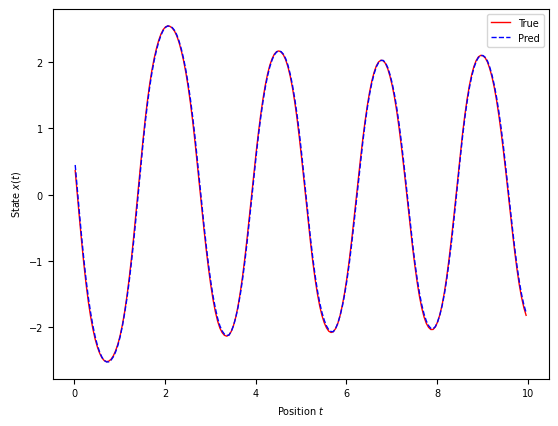

In [4]:
%run infer.py \
    --datafile_path "data/pendulum_ctr_grf_N_100_h001_T10.npy" \
    --trained_model_path "models:/pendulum/latest" \
    --state_component 0 \
    --search_len 2 \
    --search_num 200 \
    --batch_size 100 \
    --plot_trajs "True" \
    --plot_idxs 0 \
    --device 0 \
    --verbose "True"

## Infer the model with args recursively and teacher forcing = 1

Using GPU ID 0.
Shapes for LSTM-MIONet training input=(995, 999, 1), x_n=(995, 1), x_next=(995, 1)
Data memory size: 3 MB
models:/pendulum/latest
LSTM_MIONet(
  (branch_1): MLP(
    (net): ModuleList(
      (0): Linear(in_features=1, out_features=200, bias=True)
      (1): Linear(in_features=200, out_features=200, bias=True)
      (2): ReLU()
      (3): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
      (4): Linear(in_features=200, out_features=200, bias=True)
    )
  )
  (branch_2): LSTM_MLP(
    (net_1): ModuleList(
      (0): Linear(in_features=1, out_features=200, bias=True)
      (1): Linear(in_features=200, out_features=200, bias=True)
      (2): ReLU()
      (3): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
      (4): Linear(in_features=200, out_features=200, bias=True)
    )
    (lstm): LSTM(200, 10, num_layers=2, batch_first=True)
    (net_2): ModuleList(
      (0): Linear(in_features=10, out_features=200, bias=True)
      (1): Linear(in_features=200, out_fea

Infering ...: 100%|██████████| 995/995 [00:12<00:00, 78.86it/s] 



     L1-relative Error %      
     mean     st. dev.  
-----------------------------
    3.2122    0.0000
-----------------------------

     L2-relative Error %      
     mean     st. dev.  
-----------------------------
    3.2841    0.0000
-----------------------------

[L1-relative Error list, L2-relative Error list ] %     
[[3.2122288 3.2840602]]


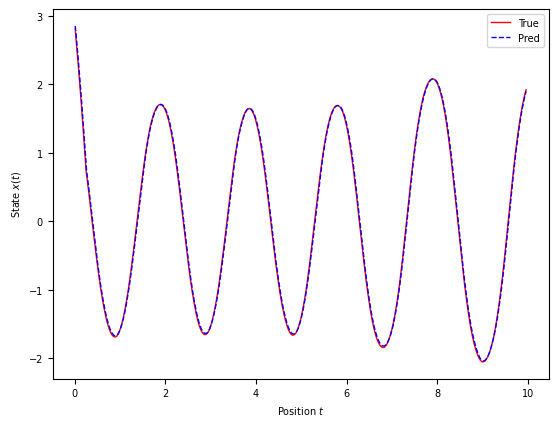

In [3]:
%run infer.py \
    --datafile_path "data/pendulum_ctr_grf_N_1_h001_T10.npy" \
    --trained_model_path "models:/pendulum/latest" \
    --recursive "True" \
    --state_component 0 \
    --autonomous "" \
    --teacher_forcing_prob 1. \
    --search_len 2 \
    --search_num 995 \
    --plot_trajs "True" \
    --plot_idxs 0 \
    --device 0 \
    --verbose "True"

## Infer the model with args recursively and teacher forcing = 0.5

Using GPU ID 0.
Shapes for LSTM-MIONet training input=(995, 999, 1), x_n=(995, 1), x_next=(995, 1)
Data memory size: 3 MB
models:/pendulum/latest
LSTM_MIONet(
  (branch_1): MLP(
    (net): ModuleList(
      (0): Linear(in_features=1, out_features=200, bias=True)
      (1): Linear(in_features=200, out_features=200, bias=True)
      (2): ReLU()
      (3): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
      (4): Linear(in_features=200, out_features=200, bias=True)
    )
  )
  (branch_2): LSTM_MLP(
    (net_1): ModuleList(
      (0): Linear(in_features=1, out_features=200, bias=True)
      (1): Linear(in_features=200, out_features=200, bias=True)
      (2): ReLU()
      (3): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
      (4): Linear(in_features=200, out_features=200, bias=True)
    )
    (lstm): LSTM(200, 10, num_layers=2, batch_first=True)
    (net_2): ModuleList(
      (0): Linear(in_features=10, out_features=200, bias=True)
      (1): Linear(in_features=200, out_fea

Infering ...: 100%|██████████| 995/995 [00:12<00:00, 79.20it/s] 



     L1-relative Error %      
     mean     st. dev.  
-----------------------------
    6.1019    0.0000
-----------------------------

     L2-relative Error %      
     mean     st. dev.  
-----------------------------
    7.3586    0.0000
-----------------------------

[L1-relative Error list, L2-relative Error list ] %     
[[6.1018653 7.3585653]]


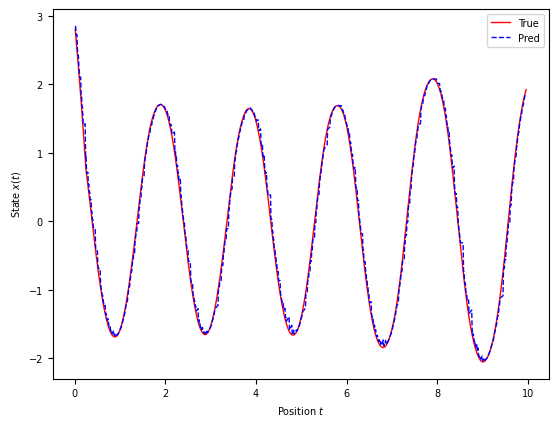

In [2]:
%run infer.py \
    --datafile_path "data/pendulum_ctr_grf_N_1_h001_T10.npy" \
    --trained_model_path "models:/pendulum/latest" \
    --recursive "True" \
    --state_component 0 \
    --autonomous "" \
    --teacher_forcing_prob 0.5 \
    --search_len 2 \
    --search_num 995 \
    --plot_trajs "True" \
    --plot_idxs 0 \
    --device 0 \
    --verbose "True"

## Infer the model with args recursively and teacher forcing = 0

Using GPU ID 0.
Shapes for LSTM-MIONet training input=(995, 999, 1), x_n=(995, 1), x_next=(995, 1)
Data memory size: 3 MB
models:/pendulum/latest
LSTM_MIONet(
  (branch_1): MLP(
    (net): ModuleList(
      (0): Linear(in_features=1, out_features=200, bias=True)
      (1): Linear(in_features=200, out_features=200, bias=True)
      (2): ReLU()
      (3): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
      (4): Linear(in_features=200, out_features=200, bias=True)
    )
  )
  (branch_2): LSTM_MLP(
    (net_1): ModuleList(
      (0): Linear(in_features=1, out_features=200, bias=True)
      (1): Linear(in_features=200, out_features=200, bias=True)
      (2): ReLU()
      (3): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
      (4): Linear(in_features=200, out_features=200, bias=True)
    )
    (lstm): LSTM(200, 10, num_layers=2, batch_first=True)
    (net_2): ModuleList(
      (0): Linear(in_features=10, out_features=200, bias=True)
      (1): Linear(in_features=200, out_fea

Infering ...: 100%|██████████| 995/995 [00:13<00:00, 74.41it/s]



     L1-relative Error %      
     mean     st. dev.  
-----------------------------
 1419.1115    0.0000
-----------------------------

     L2-relative Error %      
     mean     st. dev.  
-----------------------------
 1502.9186    0.0000
-----------------------------

[L1-relative Error list, L2-relative Error list ] %     
[[1419.1116 1502.9186]]


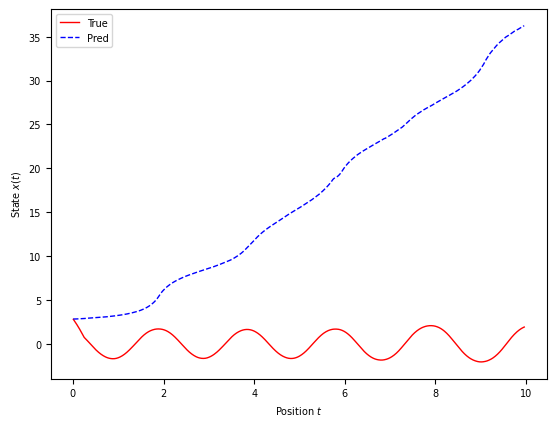

In [9]:
%run infer.py \
    --datafile_path "data/pendulum_ctr_grf_N_1_h001_T10.npy" \
    --trained_model_path "models:/pendulum/latest" \
    --recursive "True" \
    --state_component 0 \
    --autonomous "" \
    --teacher_forcing_prob 0. \
    --search_len 2 \
    --search_num 995 \
    --plot_trajs "True" \
    --plot_idxs 0 \
    --device 0 \
    --verbose "True"

## Generate **out-of-distribution** pendulum data `u=sin(t/2)`

In [10]:
print("\n=====================")
print("Running database_generator.py with arguments:")
%run database_generator.py \
    --ode_system "pendulum" \
    --ctr_func "designate" \
    --step_size 0.01 \
    --n_sample 100 \
    --t_max 10 \
    --x_init_pts -3.14 3.14 -8 8 \
    --datafile_path "data/pendulum_ctr_designate_N_200_h001_T10.npy"
print("\n=====================")


Running database_generator.py with arguments:


Generating 100 data ...: 100%|██████████| 100/100 [00:04<00:00, 24.91it/s]

Data saved in data/pendulum_ctr_designate_N_200_h001_T10.npy.



## Infer the model on **out-of-distribution** pendulum data `u=sin(t/2)`

Using GPU ID 0.
Shapes for LSTM-MIONet training input=(20000, 999, 1), x_n=(20000, 1), x_next=(20000, 1)
Data memory size: 76 MB
models:/pendulum/latest
LSTM_MIONet(
  (branch_1): MLP(
    (net): ModuleList(
      (0): Linear(in_features=1, out_features=200, bias=True)
      (1): Linear(in_features=200, out_features=200, bias=True)
      (2): ReLU()
      (3): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
      (4): Linear(in_features=200, out_features=200, bias=True)
    )
  )
  (branch_2): LSTM_MLP(
    (net_1): ModuleList(
      (0): Linear(in_features=1, out_features=200, bias=True)
      (1): Linear(in_features=200, out_features=200, bias=True)
      (2): ReLU()
      (3): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
      (4): Linear(in_features=200, out_features=200, bias=True)
    )
    (lstm): LSTM(200, 10, num_layers=2, batch_first=True)
    (net_2): ModuleList(
      (0): Linear(in_features=10, out_features=200, bias=True)
      (1): Linear(in_features=200, 

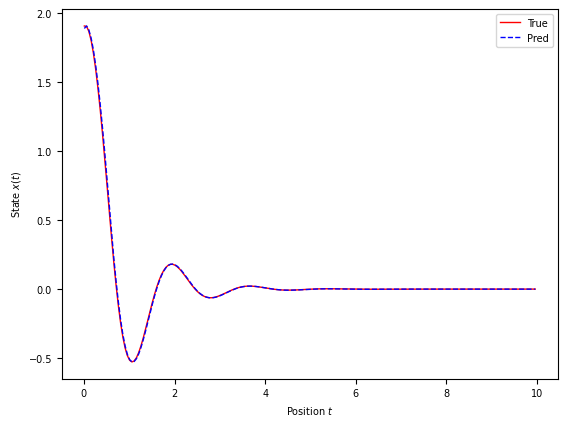

In [12]:
%run infer.py \
    --datafile_path "data/pendulum_ctr_designate_N_200_h001_T10.npy" \
    --trained_model_path "models:/pendulum/latest" \
    --state_component 0 \
    --search_len 2 \
    --search_num 200 \
    --batch_size 100 \
    --plot_trajs "True" \
    --plot_idxs 0 \
    --device 0 \
    --verbose "True"

## Infer the DeepONet_Local model (use next state `u` as input)

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using GPU ID 1.
Shapes for training input=(20000, 999, 1), x_n=(20000, 1), x_next=(20000, 1)
Data memory size: 0 MB
runs:/76205d1753d04b9f8c9791de4b066d3e/best_model_epoch_485
DeepONet_Local(
  (branch_1): MLP(
    (net): ModuleList(
      (0): Linear(in_features=1, out_features=200, bias=True)
      (1): Linear(in_features=200, out_features=200, bias=True)
      (2): ReLU()
      (3): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
      (4): Linear(in_features=200, out_features=200, bias=True)
    )
  )
  (branch_2): MLP(
    (net): ModuleList(
      (0): Linear(in_features=1, out_features=200, bias=True)
      (1): Linear(in_features=200, out_features=200, bias=True)
      (2): ReLU()
      (3): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
      (4): Linear(in_features=200, out_features=200, bias=True)
    )
  )
  (trunk): MLP(
    (net): ModuleList(
      (0): Linear(in_features=1, out_features=200, bias=True)
      (1): Linear(in_features=200, out_features=200, bias

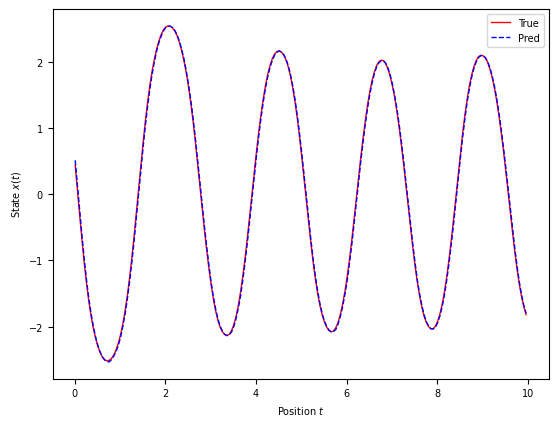

In [1]:
%run infer.py \
    --datafile_path "data/pendulum_ctr_grf_N_100_h001_T10.npy" \
    --trained_model_path "runs:/76205d1753d04b9f8c9791de4b066d3e/best_model_epoch_485" \
    --architecture "DeepONet_Local" \
    --state_component 0 \
    --search_len 2 \
    --search_num 200 \
    --batch_size 100 \
    --plot_trajs "True" \
    --plot_idxs 0 \
    --device 1 \
    --verbose "True"